# Using Jupyter Notebooks
:label:`sec_jupyter`


This section describes how to edit and run the code
in each section of this book
using the Jupyter Notebook. Make sure you have
installed Jupyter and downloaded the
code as described in
:ref:`chap_installation`.
If you want to know more about Jupyter see the excellent tutorial in
their [documentation](https://jupyter.readthedocs.io/en/latest/).


## Editing and Running the Code Locally

Suppose that the local path of the book's code is `xx/yy/d2l-en/`. Use the shell to change the directory to this path (`cd xx/yy/d2l-en`) and run the command `jupyter notebook`. If your browser does not do this automatically, open http://localhost:8888 and you will see the interface of Jupyter and all the folders containing the code of the book, as shown in :numref:`fig_jupyter00`.

![The folders containing the code of this book.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter00.png?raw=1)
:width:`600px`
:label:`fig_jupyter00`


You can access the notebook files by clicking on the folder displayed on the webpage.
They usually have the suffix ".ipynb".
For the sake of brevity, we create a temporary "test.ipynb" file.
The content displayed after you click it is
shown in :numref:`fig_jupyter01`.
This notebook includes a markdown cell and a code cell. The content in the markdown cell includes "This Is a Title" and "This is text.".
The code cell contains two lines of Python code.

![Markdown and code cells in the "text.ipynb" file.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter01.png?raw=1)
:width:`600px`
:label:`fig_jupyter01`


Double click on the markdown cell to enter edit mode.
Add a new text string "Hello world." at the end of the cell, as shown in :numref:`fig_jupyter02`.

![Edit the markdown cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter02.png?raw=1)
:width:`600px`
:label:`fig_jupyter02`


As demonstrated in :numref:`fig_jupyter03`,
click "Cell" $\rightarrow$ "Run Cells" in the menu bar to run the edited cell.

![Run the cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter03.png?raw=1)
:width:`600px`
:label:`fig_jupyter03`

After running, the markdown cell is shown in :numref:`fig_jupyter04`.

![The markdown cell after running.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter04.png?raw=1)
:width:`600px`
:label:`fig_jupyter04`


Next, click on the code cell. Multiply the elements by 2 after the last line of code, as shown in :numref:`fig_jupyter05`.

![Edit the code cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter05.png?raw=1)
:width:`600px`
:label:`fig_jupyter05`


You can also run the cell with a shortcut ("Ctrl + Enter" by default) and obtain the output result from :numref:`fig_jupyter06`.

![Run the code cell to obtain the output.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter06.png?raw=1)
:width:`600px`
:label:`fig_jupyter06`


When a notebook contains more cells, we can click "Kernel" $\rightarrow$ "Restart & Run All" in the menu bar to run all the cells in the entire notebook. By clicking "Help" $\rightarrow$ "Edit Keyboard Shortcuts" in the menu bar, you can edit the shortcuts according to your preferences.

## Advanced Options

Beyond local editing two things are quite important: editing the notebooks in the markdown format and running Jupyter remotely.
The latter matters when we want to run the code on a faster server.
The former matters since Jupyter's native ipynb format stores a lot of auxiliary data that is
irrelevant to the content,
mostly related to how and where the code is run.
This is confusing for Git, making
reviewing contributions very difficult.
Fortunately there is an alternative---native editing in the markdown format.

### Markdown Files in Jupyter

If you wish to contribute to the content of this book, you need to modify the
source file (md file, not ipynb file) on GitHub.
Using the notedown plugin we
can modify notebooks in the md format directly in Jupyter.


First, install the notedown plugin, run the Jupyter Notebook, and load the plugin:

```
pip install d2l-notedown  # You may need to uninstall the original notedown.
jupyter notebook --NotebookApp.contents_manager_class='notedown.NotedownContentsManager'
```

You may also turn on the notedown plugin by default whenever you run the Jupyter Notebook.
First, generate a Jupyter Notebook configuration file (if it has already been generated, you can skip this step).

```
jupyter notebook --generate-config
```

Then, add the following line to the end of the Jupyter Notebook configuration file (for Linux or macOS, usually in the path `~/.jupyter/jupyter_notebook_config.py`):

```
c.NotebookApp.contents_manager_class = 'notedown.NotedownContentsManager'
```

After that, you only need to run the `jupyter notebook` command to turn on the notedown plugin by default.

### Running Jupyter Notebooks on a Remote Server

Sometimes, you may want to run Jupyter notebooks on a remote server and access it through a browser on your local computer. If Linux or macOS is installed on your local machine (Windows can also support this function through third-party software such as PuTTY), you can use port forwarding:

```
ssh myserver -L 8888:localhost:8888
```

The above string `myserver` is the address of the remote server.
Then we can use http://localhost:8888 to access the remote server `myserver` that runs Jupyter notebooks. We will detail on how to run Jupyter notebooks on AWS instances
later in this appendix.

### Timing

We can use the `ExecuteTime` plugin to time the execution of each code cell in Jupyter notebooks.
Use the following commands to install the plugin:

```
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextension enable execute_time/ExecuteTime
```

## Summary

* Using the Jupyter Notebook tool, we can edit, run, and contribute to each section of the book.
* We can run Jupyter notebooks on remote servers using port forwarding.


## Exercises

1. Edit and run the code in this book with the Jupyter Notebook on your local machine.
1. Edit and run the code in this book with the Jupyter Notebook *remotely* via port forwarding.
1. Compare the running time of the operations $\mathbf{A}^\top \mathbf{B}$ and $\mathbf{A} \mathbf{B}$ for two square matrices in $\mathbb{R}^{1024 \times 1024}$. Which one is faster?


[Discussions](https://discuss.d2l.ai/t/421)


In [4]:
from pathlib import Path  # Fix: Add this import
import pandas as pd
import numpy as np
import statsmodels.api as sm

def calculate_sigma_ne(estimation_folder):
    sigma_squared_list = []

    for file in Path(estimation_folder).glob("*.csv"):  # Now Path is defined
        df = pd.read_csv(file)
        est_data = df[df["Relative time"].between(-100, -16)]
        X = sm.add_constant(est_data["Benchmark Return (%)"])
        model = sm.OLS(est_data["Index Return (%)"], X).fit()
        residuals = model.resid
        sigma_i_sq = residuals.var(ddof=1)
        sigma_squared_list.append(sigma_i_sq)

    sigma_ne = np.sqrt(np.mean(sigma_squared_list))
    return sigma_ne

sigma_ne = calculate_sigma_ne("/content/drive/MyDrive/est data")
print(f"Aggregated standard deviation (σ_N,e): {sigma_ne:.6f}")


Aggregated standard deviation (σ_N,e): 1.044167


In [7]:
import pandas as pd
import numpy as np

# Load your combined abnormal returns data
combined_ar = pd.read_csv('/content/drive/MyDrive/combined_abnormal_returns.csv')

# Set your calculated sigma_ne (replace with your actual value)
sigma_ne = 1.044167  # Example value, replace with your own

# Number of indices (all columns except 'Relative time')
n_indices = combined_ar.shape[1] - 1
window_length = len(combined_ar)  # Should be 31 for -15 to +15

# 1. Calculate AAR
returns_only = combined_ar.drop(columns=['Relative time'])
combined_ar['AAR'] = returns_only.mean(axis=1)

# 2. Calculate CAAR
combined_ar['CAAR'] = combined_ar['AAR'].cumsum()

# 3. Calculate t-statistics
combined_ar['AAR_tstat'] = combined_ar['AAR'] / (sigma_ne / np.sqrt(n_indices))
combined_ar['CAAR_tstat'] = combined_ar['CAAR'] / (sigma_ne * np.sqrt(window_length))

# 4. Save the results to a new CSV file
result_cols = ['Relative time', 'AAR', 'AAR_tstat', 'CAAR', 'CAAR_tstat']
final_results = combined_ar[result_cols]
final_results.to_csv('parametric_AAR_CAAR_results.csv', index=False)

print("Results saved to 'parametric_AAR_CAAR_results.csv'.")
print(final_results.head())


Results saved to 'parametric_AAR_CAAR_results.csv'.
   Relative time       AAR  AAR_tstat      CAAR  CAAR_tstat
0            -15  0.165111   0.651975  0.165111    0.028400
1            -14  0.077242   0.305007  0.242354    0.041687
2            -13 -0.003507  -0.013850  0.238846    0.041084
3            -12 -0.085555  -0.337830  0.153292    0.026367
4            -11 -0.267809  -1.057498 -0.114517   -0.019698


In [10]:
import pandas as pd
import numpy as np

# Load your combined abnormal returns file
combined_ar = pd.read_csv('/content/drive/MyDrive/combined_abnormal_returns.csv')

# Calculate Average Abnormal Return (AAR)
combined_ar['AAR'] = combined_ar.drop(columns=['Relative time']).mean(axis=1)

# Calculate Cumulative Average Abnormal Return (CAAR)
combined_ar['CAAR'] = combined_ar['AAR'].cumsum()


In [11]:
# Use your precomputed σ_N,e (replace 0.005328 with your value)
sigma_ne = 1.044167
n_indices = 17  # Number of indices
window_length = 31  # -15 to +15 days

combined_ar['AAR_tstat'] = combined_ar['AAR'] / (sigma_ne / np.sqrt(n_indices))
combined_ar['CAAR_tstat'] = combined_ar['CAAR'] / (sigma_ne * np.sqrt(window_length))


In [17]:
from pathlib import Path
import pandas as pd
import numpy as np

def corrado_test(combined_ar, estimation_folder):
    all_data = []

    # Identify index columns (skip 'Relative time')
    index_cols = [col for col in combined_ar.columns if col != 'Relative time']

    for idx_col in index_cols:
        # Remove '_trimmed' from column to get base index name
        index_name = idx_col.replace('_trimmed', '').strip()
        est_file = Path(estimation_folder) / f"est_{index_name}.csv"

        try:
            est_data = pd.read_csv(est_file)
            est_data = est_data[est_data["Relative time"].between(-100, -16)]
            # Calculate abnormal returns for estimation window
            est_data['Abnormal Return'] = est_data['Index Return (%)'] - est_data['Benchmark Return (%)']

            # Get event data from combined_ar
            event_data = pd.DataFrame({
                'Relative time': combined_ar['Relative time'],
                'Abnormal Return': combined_ar[idx_col]
            })

            # Combine estimation + event data
            full_data = pd.concat([est_data[['Relative time', 'Abnormal Return']], event_data])
            full_data['Index Name'] = index_name
            all_data.append(full_data)
        except FileNotFoundError:
            print(f"File not found: {est_file} - Skipping {index_name}")
            continue

    if not all_data:
        raise ValueError("No valid data processed. Check filenames and folder path.")

    # Combine all indices
    full_data = pd.concat(all_data)

    # Rank abnormal returns within each index
    full_data['Rank'] = full_data.groupby('Index Name')['Abnormal Return'] \
                                .transform(lambda x: x.rank(method='average'))

    # Calculate Corrado t-stat for each event day
    T = full_data['Relative time'].nunique()
    results = []

    for day in combined_ar['Relative time']:
        day_ranks = full_data[full_data['Relative time'] == day]['Rank']
        N = len(day_ranks)
        numerator = (2 * day_ranks.sum() - (T - 1) * N)
        denominator = np.sqrt(N * (T**2 - 1) / 3)
        t_stat = numerator / denominator if denominator != 0 else np.nan
        results.append(t_stat)

    combined_ar['Corrado_tstat'] = results
    return combined_ar

# Usage example:
combined_ar = pd.read_csv("/content/drive/MyDrive/combined_abnormal_returns.csv")
corrado_results = corrado_test(combined_ar, "/content/drive/MyDrive/est data")
corrado_results.to_csv("corrado_test_results.csv", index=False)
print(corrado_results[['Relative time', 'Corrado_tstat']].head())


   Relative time  Corrado_tstat
0            -15       1.039384
1            -14       1.372567
2            -13       0.561340
3            -12      -0.307832
4            -11      -1.111815


In [19]:
import pandas as pd

# Load your results
parametric = pd.read_csv('/content/parametric_AAR_CAAR_results.csv')
corrado = pd.read_csv('/content/corrado_test_results.csv')

# Merge on 'Relative time'
table = pd.merge(parametric, corrado[['Relative time', 'Corrado_tstat']], on='Relative time')

# Save the main event study results table
table.to_csv('event_study_main_table.csv', index=False)

# Display
print(table.head(10))


   Relative time       AAR  AAR_tstat      CAAR  CAAR_tstat  Corrado_tstat
0            -15  0.165111   0.651975  0.165111    0.028400       1.039384
1            -14  0.077242   0.305007  0.242354    0.041687       1.372567
2            -13 -0.003507  -0.013850  0.238846    0.041084       0.561340
3            -12 -0.085555  -0.337830  0.153292    0.026367      -0.307832
4            -11 -0.267809  -1.057498 -0.114517   -0.019698      -1.111815
5            -10  0.028465   0.112400 -0.086052   -0.014802       0.539611
6             -9 -0.079900  -0.315502 -0.165952   -0.028545      -0.170213
7             -8 -0.086761  -0.342593 -0.252713   -0.043469      -0.199185
8             -7  0.028962   0.114363 -0.223751   -0.038487       0.923495
9             -6 -0.408299  -1.612253 -0.632050   -0.108718      -1.720236


In [20]:
table['AAR_sig'] = table['AAR_tstat'].apply(lambda x: '*' if abs(x) > 2.11 else '')
table['CAAR_sig'] = table['CAAR_tstat'].apply(lambda x: '*' if abs(x) > 2.11 else '')
table['Corrado_sig'] = table['Corrado_tstat'].apply(lambda x: '*' if abs(x) > 1.96 else '')

# Save with significance
table.to_csv('event_study_significance_table.csv', index=False)


In [27]:
def window_stats(df, start, end):
    window = df[(df['Relative time'] >= start) & (df['Relative time'] <= end)]
    caar = window['AAR'].sum()
    caar_tstat = window['CAAR_tstat'].iloc[-1]  # Last day of window
    return pd.Series({'Window': f'[{start},{end}]', 'CAAR': caar, 'CAAR_tstat': caar_tstat})

windows = [[-3,3],[-7,7],[-1,1]]
window_table = pd.concat([window_stats(table, w[0], w[1]) for w in windows], axis=1).T
window_table.to_csv('event_study_short_window_table.csv', index=False)
print(window_table)


   Window      CAAR CAAR_tstat
0  [-3,3]  0.183799   -0.10936
1  [-7,7] -0.724994  -0.168174
2  [-1,1]  -0.15546  -0.129254


In [22]:
event_day = corrado[corrado['Relative time'] == 0]
event_day = event_day.drop(columns=['Corrado_tstat'])
event_day = event_day.set_index('Relative time').T
event_day.columns = ['Event Day AR']
event_day.to_csv('event_day_abnormal_returns.csv')
print(event_day)


                                                    Event Day AR
BSE Sensex 30 Historical Data_trimmed                   0.751750
Budapest SE Historical Data_trimmed                     1.675614
CAC 40 Historical Data_trimmed                         -1.212263
DAX Historical Data_trimmed                            -1.958919
FTSE 100 Historical Data_trimmed                       -0.504636
FTSE MIB Historical Data_trimmed                       -2.300841
FTSE Malaysia KLCI Historical Data_trimmed              0.500423
FTSE Straits Times Singapore Historical Data_tr...      0.037197
KOSPI Historical Data_trimmed                          -1.314568
MOEX Russia Index Historical Data_trimmed               1.816962
Nikkei 225 Historical Data_trimmed                      1.276961
S&P_ASX 200 Historical Data_trimmed                     0.420392
S&P_BMV IPC Historical Data_trimmed                     1.187513
S&P_TSX Composite Historical Data_trimmed               0.168041
Shanghai Composite Histor

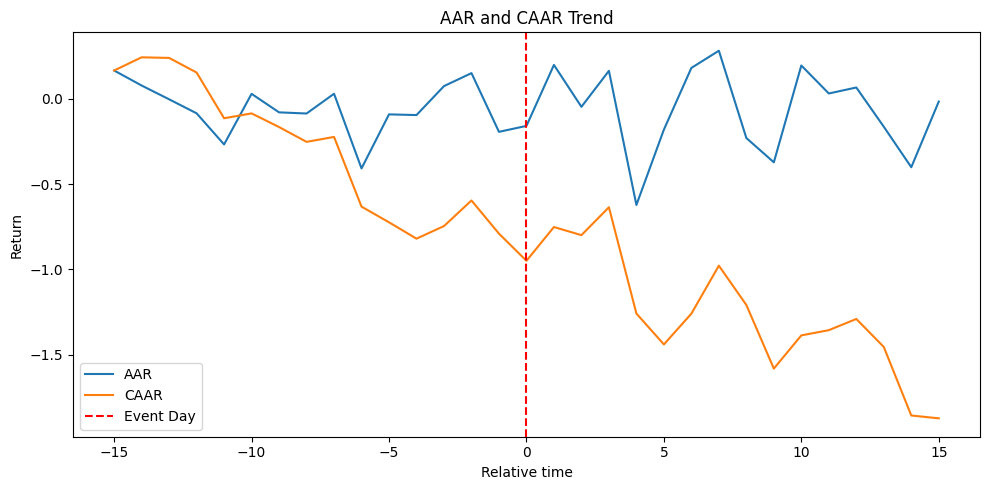

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(table['Relative time'], table['AAR'], label='AAR')
plt.plot(table['Relative time'], table['CAAR'], label='CAAR')
plt.axvline(0, color='red', linestyle='--', label='Event Day')
plt.xlabel('Relative time')
plt.ylabel('Return')
plt.legend()
plt.title('AAR and CAAR Trend')
plt.tight_layout()
plt.savefig('AAR_CAAR_trend.png')
plt.show()


In [24]:
import pandas as pd

# Load data
parametric = pd.read_csv('/content/parametric_AAR_CAAR_results.csv')
corrado = pd.read_csv('/content/corrado_test_results.csv')

# Merge and format
table4 = pd.merge(parametric, corrado[['Relative time', 'Corrado_tstat']], on='Relative time')
table4['AAR_sig'] = table4['AAR_tstat'].apply(lambda x: '*' if abs(x) > 2.11 else '')
table4['CAAR_sig'] = table4['CAAR_tstat'].apply(lambda x: '*' if abs(x) > 2.11 else '')
table4['Corrado_sig'] = table4['Corrado_tstat'].apply(lambda x: '*' if abs(x) > 1.96 else '')

# Save
table4.to_csv('replicated_table4.csv', index=False)


In [25]:
import pandas as pd

# Classification dictionary (already defined from previous step)
market_classification = {
    'BSE Sensex 30 Historical Data_trimmed': 'Emerging',
    'Budapest SE Historical Data_trimmed': 'Emerging',
    'CAC 40 Historical Data_trimmed': 'Developed',
    'DAX Historical Data_trimmed': 'Developed',
    'FTSE 100 Historical Data_trimmed': 'Developed',
    'FTSE MIB Historical Data_trimmed': 'Developed',
    'FTSE Malaysia KLCI Historical Data_trimmed': 'Emerging',
    'FTSE Straits Times Singapore Historical Data_trimmed': 'Developed',
    'KOSPI Historical Data_trimmed': 'Emerging',
    'MOEX Russia Index Historical Data_trimmed': 'Emerging',
    'Nikkei 225 Historical Data_trimmed': 'Developed',
    'S&P/ASX 200 Historical Data_trimmed': 'Developed',
    'S&P/BMV IPC Historical Data_trimmed': 'Emerging',
    'S&P/TSX Composite Historical Data_trimmed': 'Developed',
    'Shanghai Composite Historical Data_trimmed': 'Emerging',
    'South Africa Top 40 Historical Data_trimmed': 'Emerging',
    'WIG20 Historical Data_trimmed': 'Emerging'
}

    # ... (add all 17 entries from our previous classification)


# Load combined abnormal returns
combined_ar = pd.read_csv('/content/drive/MyDrive/combined_abnormal_returns.csv')

# Split into developed/emerging groups using actual column names
developed = [col for col in combined_ar.columns
             if market_classification.get(col) == 'Developed' and col != 'Relative time']
emerging = [col for col in combined_ar.columns
            if market_classification.get(col) == 'Emerging' and col != 'Relative time']

def regional_stats(df, indices):
    """Calculate group-level AAR and CAAR"""
    group_data = df[['Relative time'] + indices].copy()
    group_data['AAR'] = group_data[indices].mean(axis=1)
    group_data['CAAR'] = group_data['AAR'].cumsum()
    return group_data[['Relative time', 'AAR', 'CAAR']]

# Calculate metrics
developed_stats = regional_stats(combined_ar, developed)
emerging_stats = regional_stats(combined_ar, emerging)

# Count significant days (threshold = 2.11 for 16 degrees of freedom)
def count_significant(stats_df):
    return {
        'Sig_AAR': sum(stats_df['AAR'].abs() > 2.11),
        'Sig_CAAR': sum(stats_df['CAAR'].abs() > 2.11)
    }

developed_counts = count_significant(developed_stats)
emerging_counts = count_significant(emerging_stats)

# Create final table
results_df = pd.DataFrame({
    'Market': ['Developed', 'Emerging'],
    'Sig_AAR': [developed_counts['Sig_AAR'], emerging_counts['Sig_AAR']],
    'Sig_CAAR': [developed_counts['Sig_CAAR'], emerging_counts['Sig_CAAR']]
})

# Save results
results_df.to_csv('regional_significance_results.csv', index=False)

# Also save full statistics for plotting
developed_stats.to_csv('developed_market_stats.csv', index=False)
emerging_stats.to_csv('emerging_market_stats.csv', index=False)
